In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Para preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest

# Ignorar warnings (opcional)
import warnings
warnings.filterwarnings("ignore")

# 1. CARGA DE DATOS

df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")


df.head()



age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [3]:
# Dimensiones del dataset
print("Shape (filas, columnas):", df.shape)

# Información de tipos de datos y nulos
df.info()

# Descripción estadística de numéricas
df.describe()


Shape (filas, columnas): (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

Detección de duplicados

In [4]:
print("Número de filas duplicadas:", df.duplicated().sum())

# Si quisieras eliminar duplicados:
df = df.drop_duplicates()
print("Shape tras eliminar duplicados:", df.shape)


Número de filas duplicadas: 12
Shape tras eliminar duplicados: (41176, 21)


Revisión rápida de valores nulos

In [5]:
print("Valores nulos totales por columna:")
print(df.isnull().sum())


Valores nulos totales por columna:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [6]:
# Información de tipos de datos y nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

Factorizar variables categoricas

In [8]:
df["y_n"] = pd.factorize(df["y"])[0]

# Guardar la columna codificada
transformation_rules_target= {row["y"]: row["y_n"] for _, row in df[["y", "y_n"]].drop_duplicates().iterrows()}

import json

with open("transformation_rules_target.json", "w") as f:
  json.dump(transformation_rules_target, f)


with open("transformation_rules_target.json", "r") as f:
  transformation_rules_target = json.load(f)

df["y_n"] = df["y"].apply(lambda x: transformation_rules_target[x])

# INVESTIGAR: ONE HOT ENCODING

In [ ]:
# import pandas as pd
# import json

# def one_hot_encode_and_save(df, output_file='transformacion.json'):
#     """
#     Realiza One-Hot Encoding en un DataFrame, identifica automáticamente las columnas categóricas,
#     y guarda el resultado en un archivo JSON.

#     Parámetros:
#     df (pd.DataFrame): DataFrame a transformar.
#     output_file (str): Nombre del archivo de salida JSON (por defecto 'transformacion.json').
#     """
#     # Paso 2: Identificar columnas categóricas
#     # Las columnas categóricas suelen ser de tipo 'object' en pandas
#     categorical_columns = df.select_dtypes(include=['object']).columns
    
#     # Paso 3: Aplicar One-Hot Encoding
#     df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, prefix_sep='_')
    
#     # Paso 4: Guardar el resultado en un archivo JSON
#     # Convertimos el DataFrame a un diccionario y luego a JSON
#     df_encoded_dict = df_encoded.to_dict(orient='records')
#     with open(output_file, 'w') as json_file:
#         json.dump(df_encoded_dict, json_file, indent=4)
    
#     print(f"Dataset transformado guardado en {output_file}")

# # Ejemplo de uso de la función
# df = pd.read_csv("/workspaces/ejercicio_regresion_logistica/data/raw/bank-marketing-campaign-data.csv", sep=";")  # Asumiendo que ya tenemos un DataFrame cargado
# one_hot_encode_and_save(df)

Dataset transformado guardado en transformacion.json


a) Histplot para algunas variables numéricas

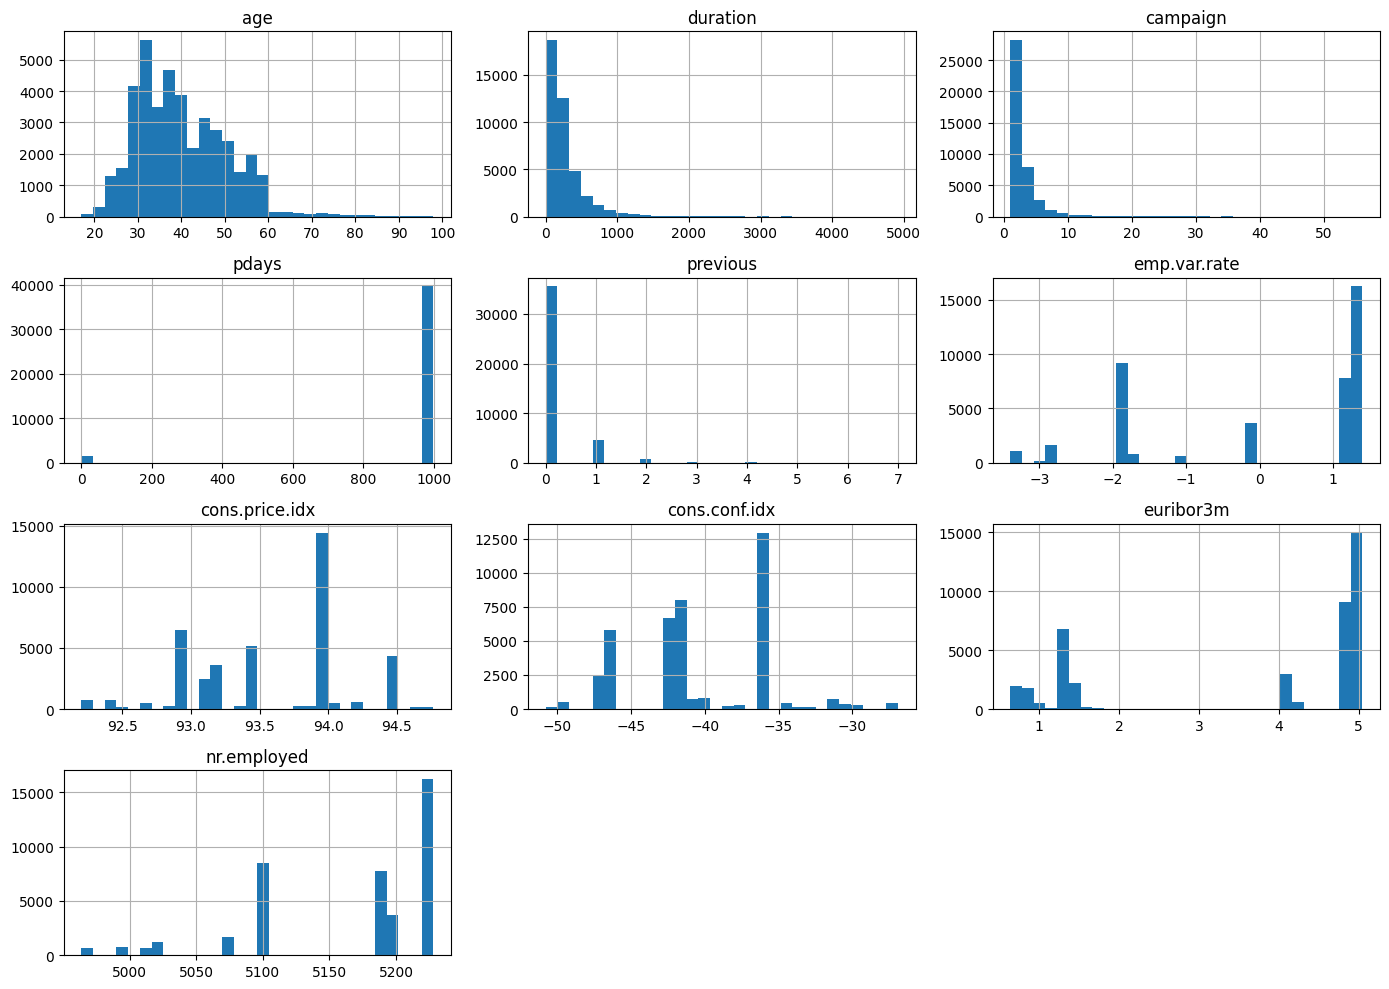

In [7]:
# Detectar columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Generar histogramas para las columnas numéricas
df[numeric_cols].hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()


b) Countplot para algunas variables categóricas

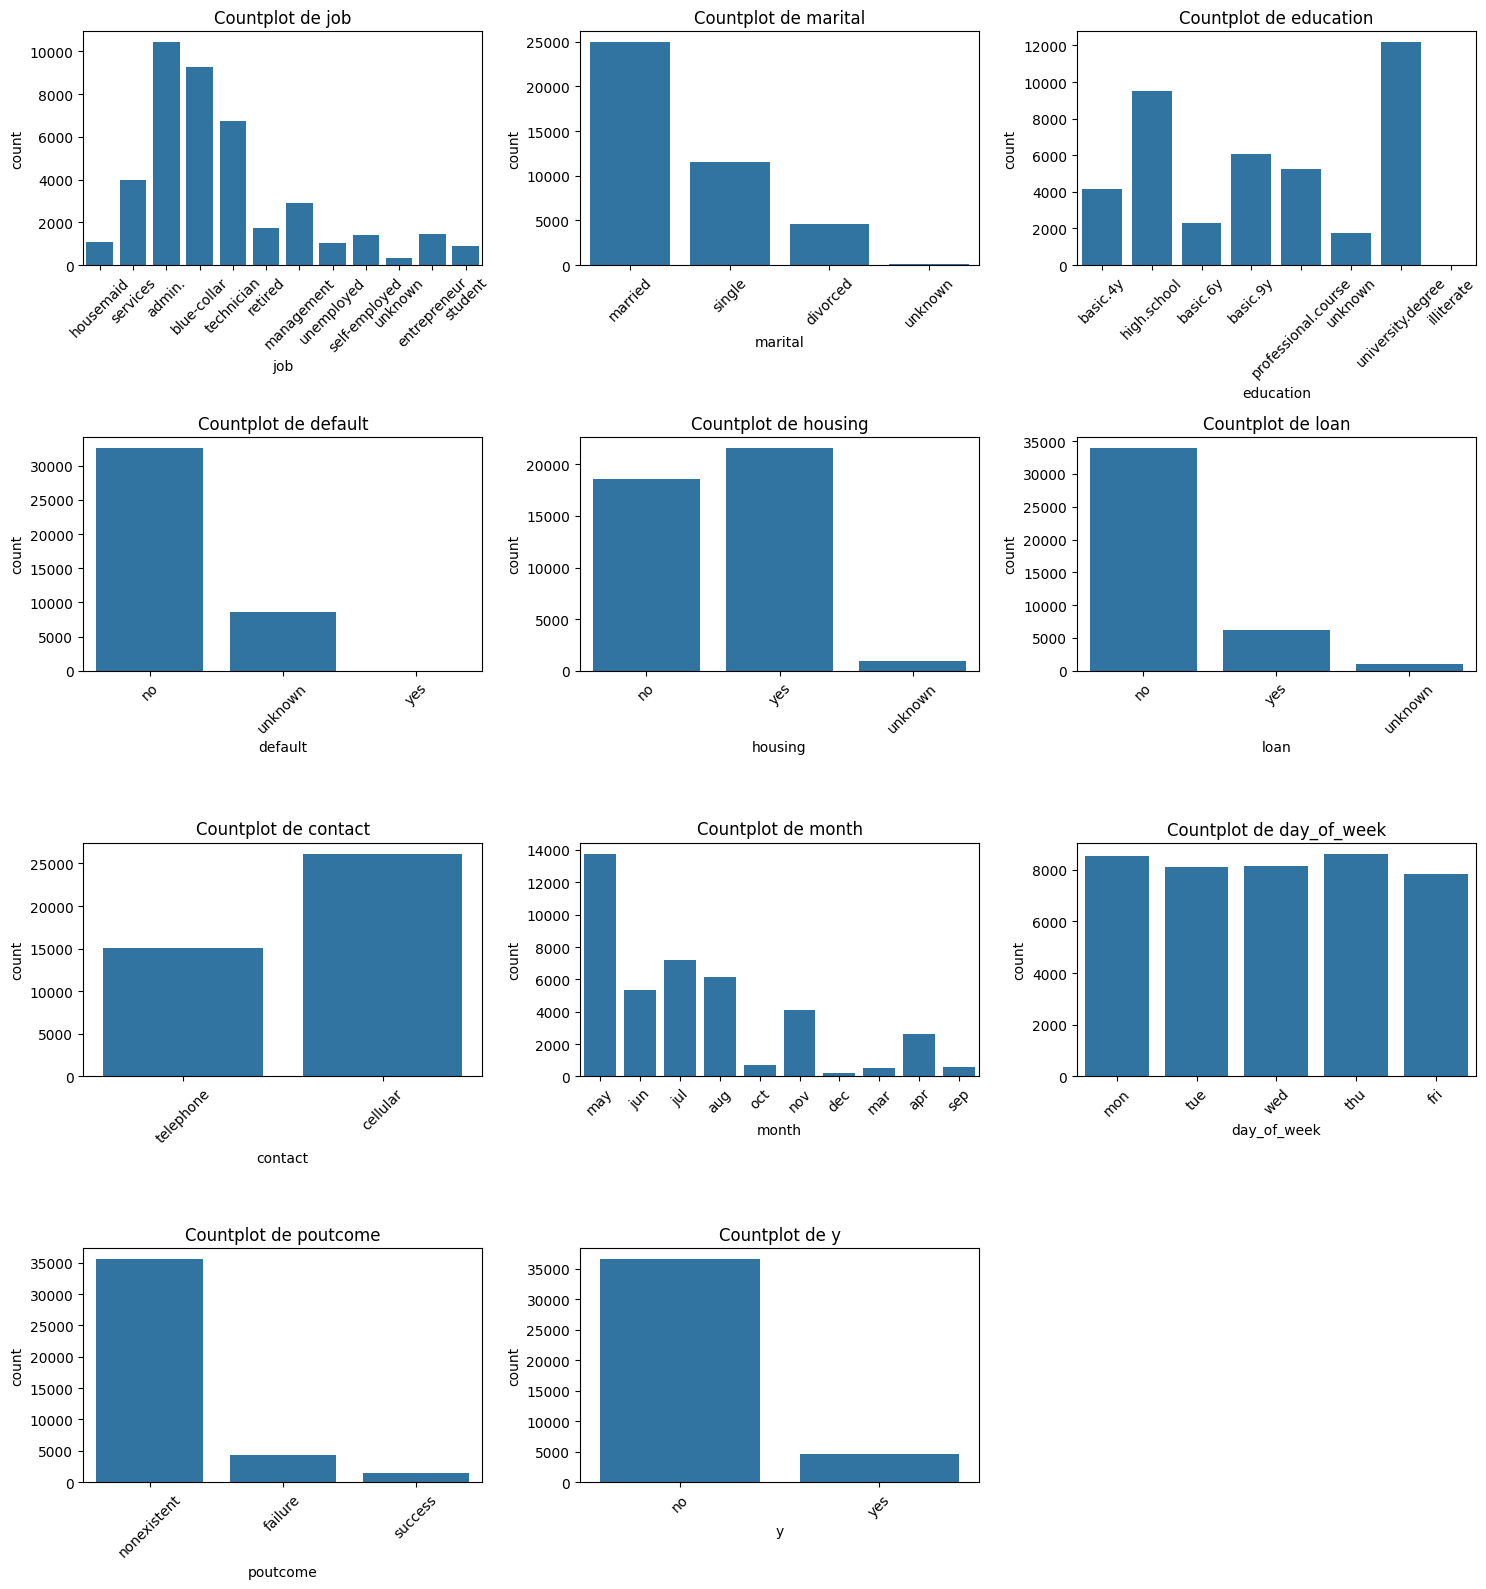

In [8]:
# Selecciona las columnas categóricas (tipo 'object')
categorical_cols = df.select_dtypes(include=['object']).columns

# Calcula el número de filas y columnas para los subplots
num_plots = len(categorical_cols)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols  # Asegúrate de tener suficientes filas

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i])
        axes[i].set_title(f"Countplot de {col}")
        axes[i].tick_params(axis='x', rotation=45)

# Oculta los ejes no utilizados
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


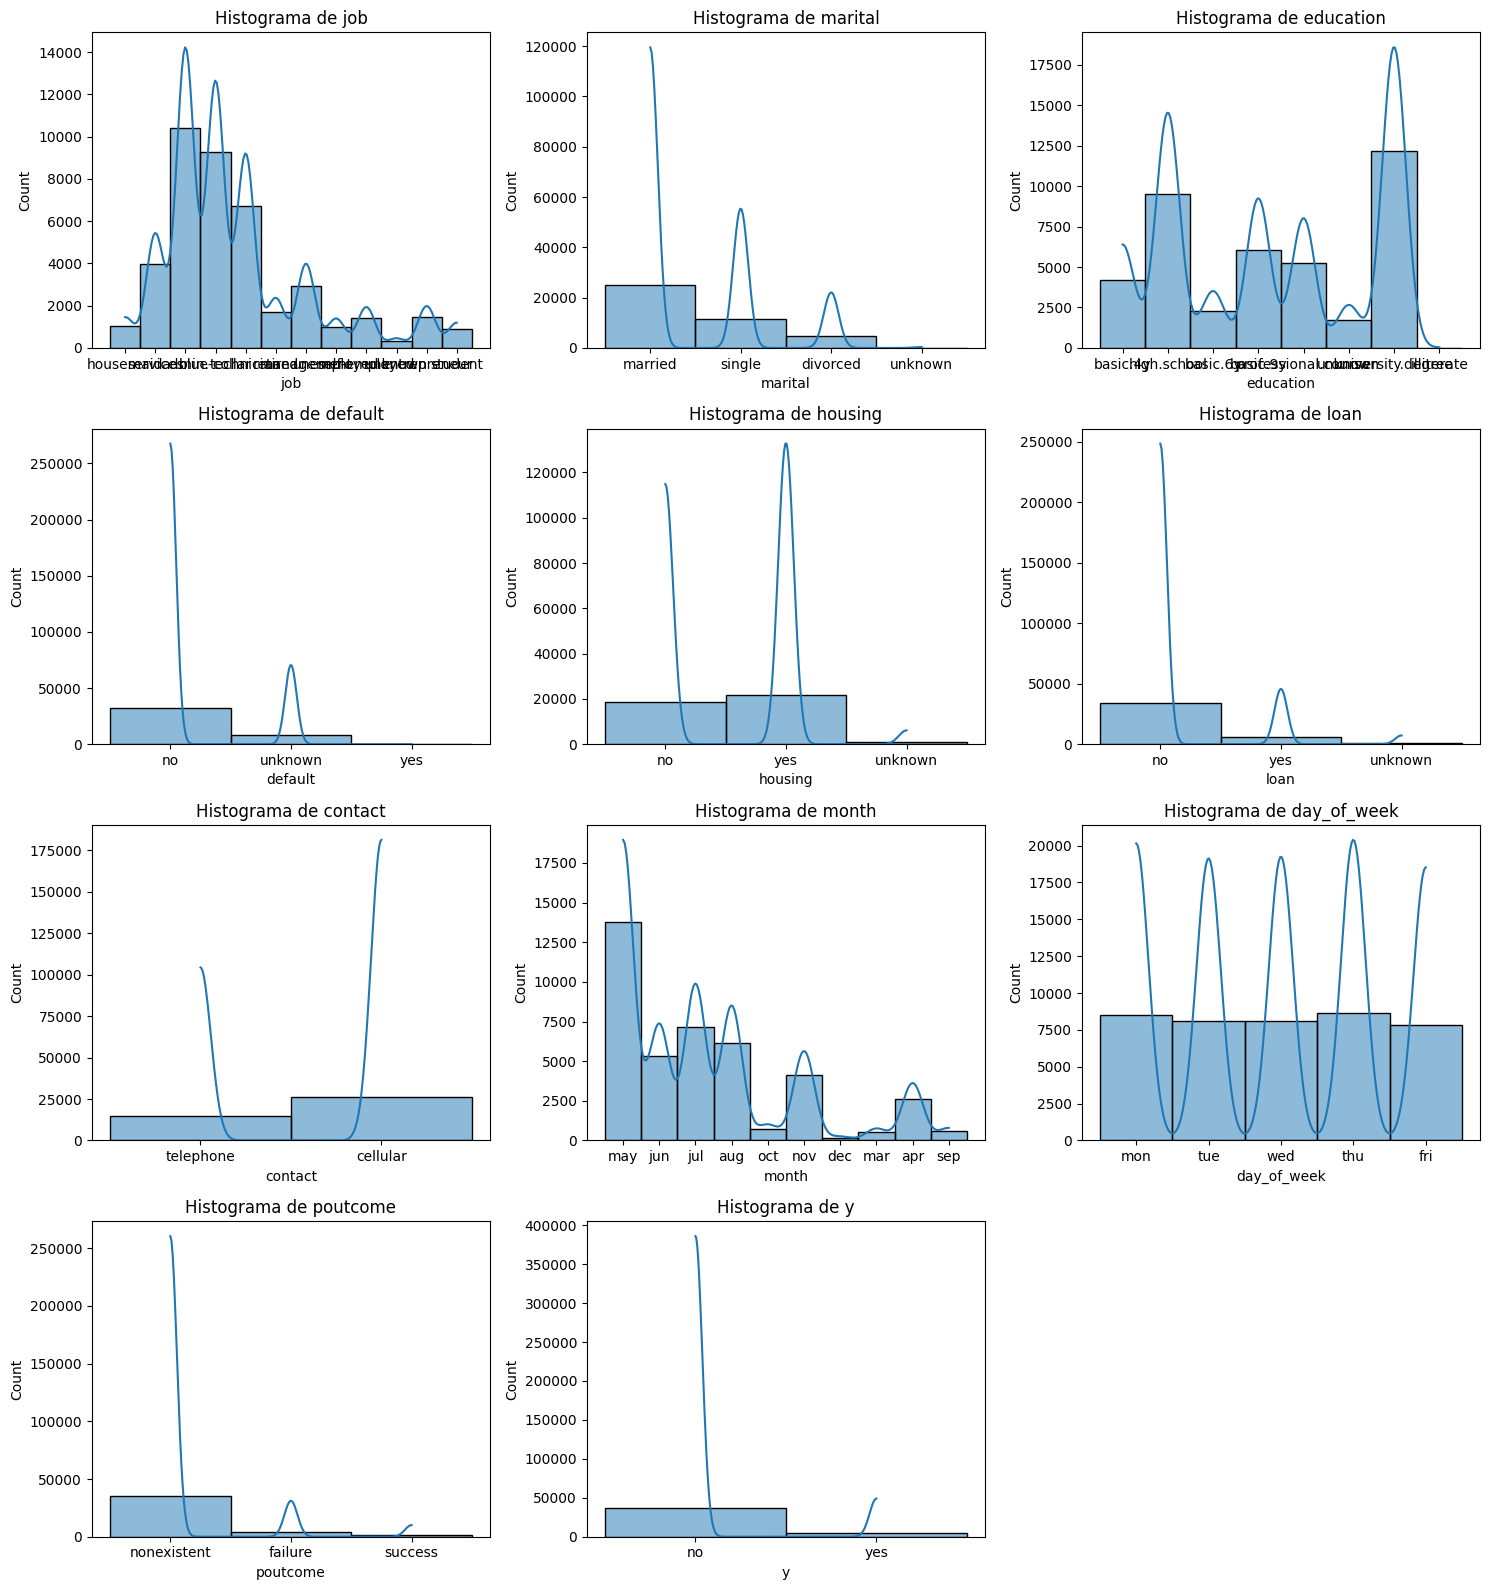

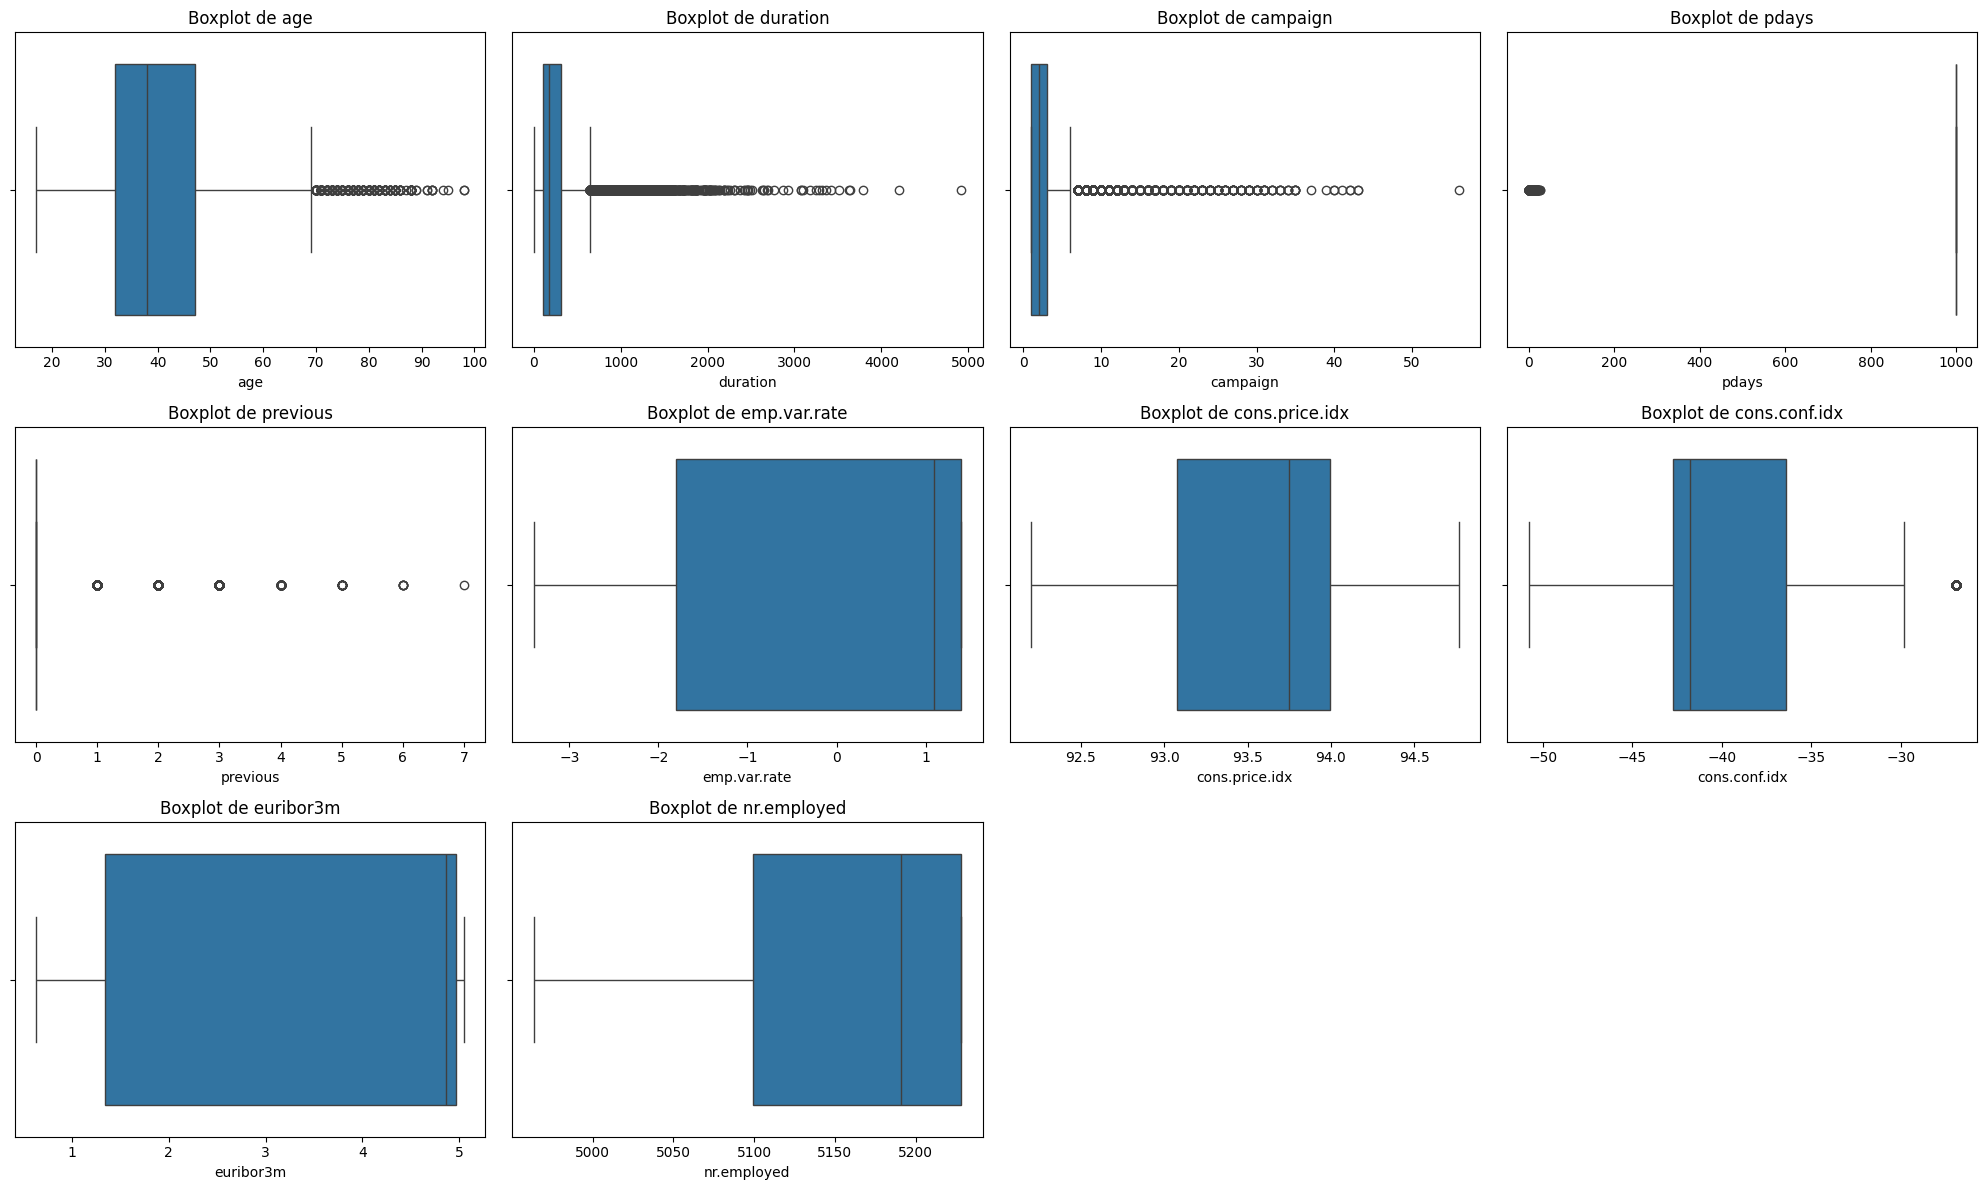

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Clasificar columnas según su tipo
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Definir función para gráficos en cuadrícula
def plot_grid(columns, plot_func, title, n_cols=3):
    n_rows = math.ceil(len(columns) / n_cols)  # Calcular número de filas
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Asegurar compatibilidad con iteración

    for i, col in enumerate(columns):
        plot_func(df, col, axes[i])  # Función para graficar
        axes[i].set_title(f"{title} de {col}")
    
    # Ocultar los ejes sobrantes (si hay más espacios que gráficos)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])  # Eliminar subgráficos vacíos

    plt.tight_layout()
    plt.show()

# Crear funciones específicas para histogramas y boxplots
def hist_plot(data, column, ax):
    sns.histplot(data=data, x=column, kde=True, ax=ax)

def box_plot(data, column, ax):
    sns.boxplot(data=data, x=column, y=None, ax=ax)

# Graficar variables categóricas (histogramas)
plot_grid(categorical_cols, hist_plot, "Histograma", n_cols=3)

# Graficar variables numéricas (boxplots)
plot_grid(numerical_cols, box_plot, "Boxplot", n_cols=4)

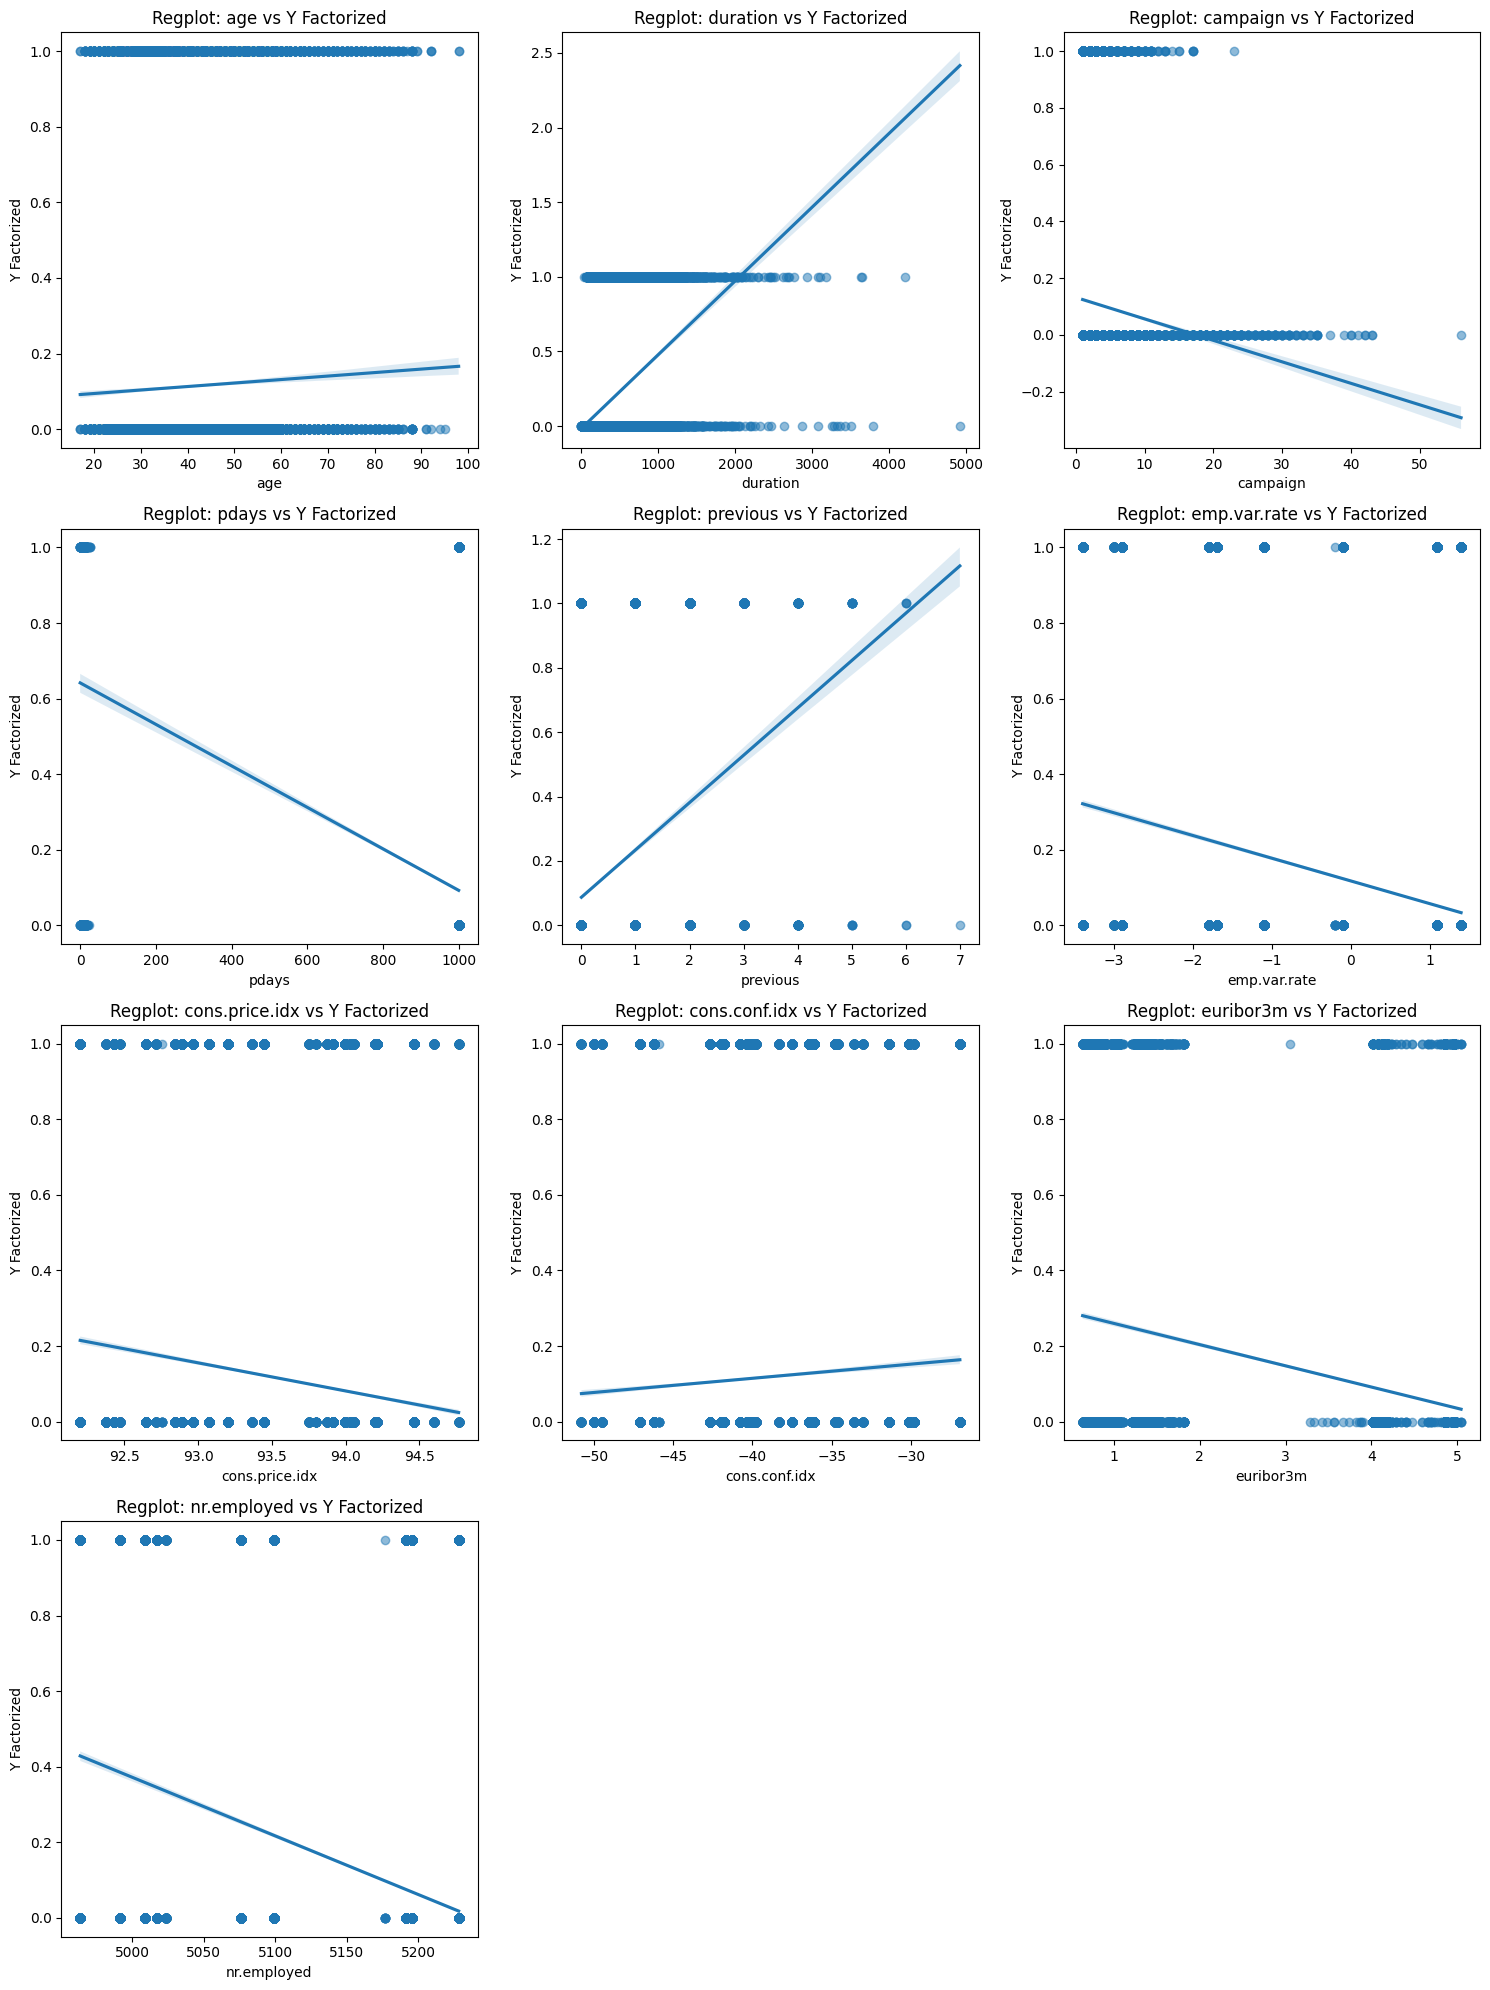

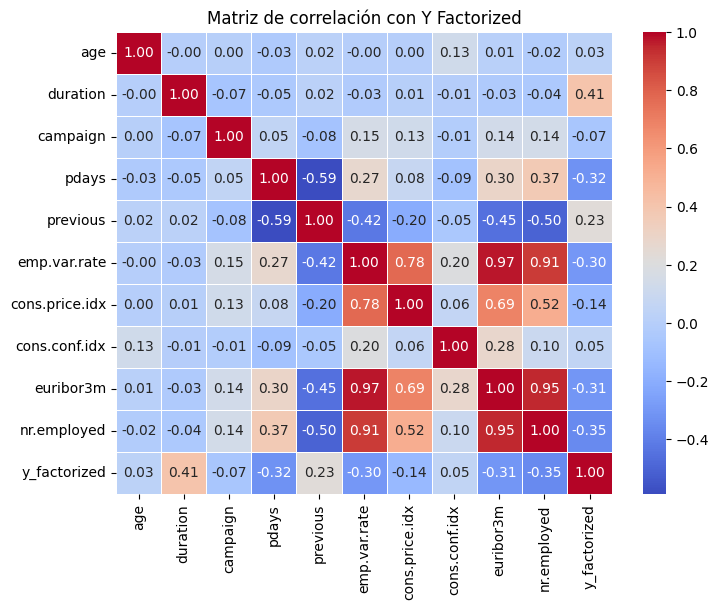

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Factorizar la variable objetivo "y" sin modificar el DataFrame
y_factorized, _ = pd.factorize(df["y"])

# Identificar columnas numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Configuración para subplots (3 gráficos por fila)
num_cols = 3  # Número de gráficos por fila
num_plots = len(numerical_cols)  # Número total de gráficos
num_rows = (num_plots + num_cols - 1) // num_cols  # Calcular filas necesarias

# Crear el espacio para subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Asegurar que 'axes' sea una matriz plana para iterar fácilmente
axes = axes.flatten()

# Iterar sobre cada columna y graficar en el espacio asignado
for i, col in enumerate(numerical_cols):
    sns.regplot(data=df, x=col, y=y_factorized, ax=axes[i], scatter_kws={'alpha': 0.5})
    axes[i].set_title(f"Regplot: {col} vs Y Factorized")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Y Factorized")

# Eliminar ejes vacíos si hay menos gráficos que espacios creados
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar la distribución de los gráficos
plt.tight_layout()
plt.show()

# Heatmap con correlaciones de todas las variables numéricas respecto a 'y_factorized'
plt.figure(figsize=(8, 6))
correlation_matrix = df[numerical_cols].assign(y_factorized=y_factorized).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación con Y Factorized")
plt.show()


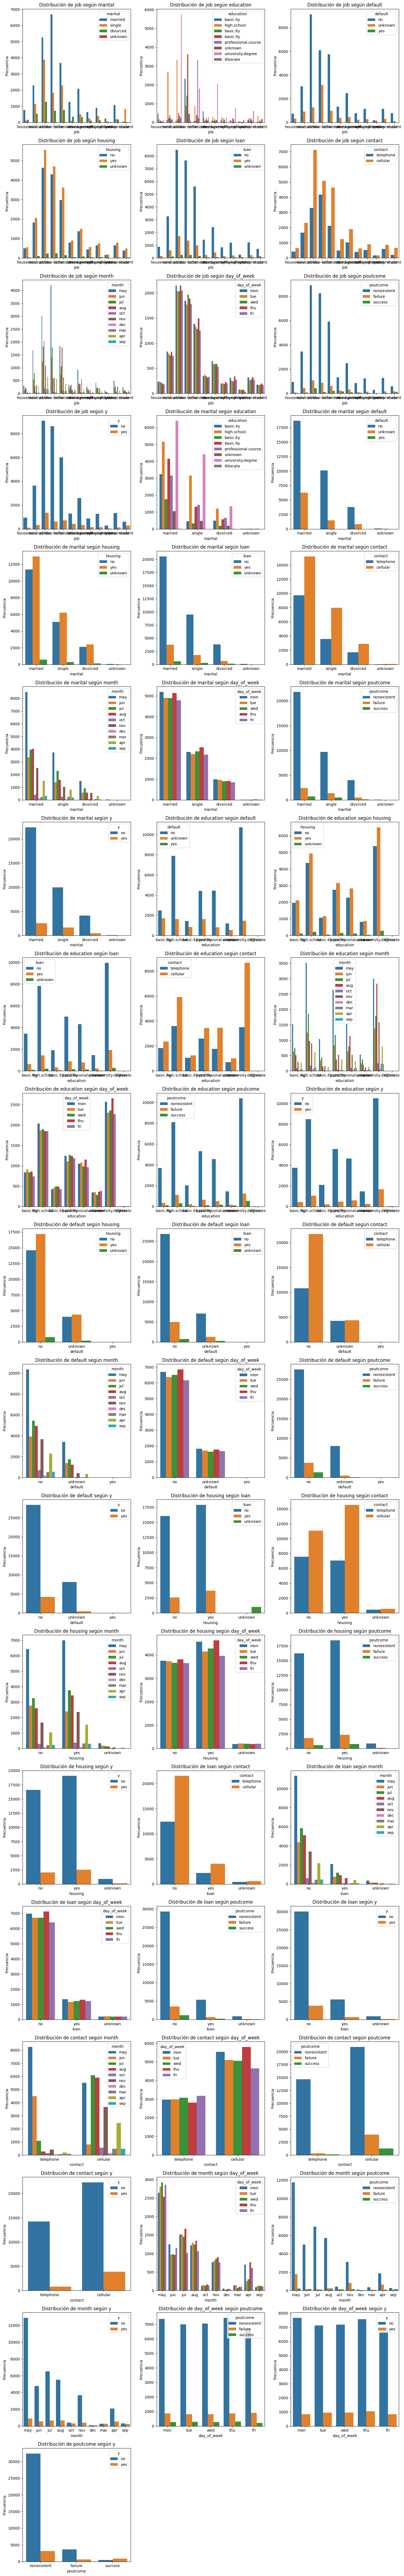

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import itertools  # Para hacer combinaciones de pares de variables categóricas

# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns

# Generar todas las combinaciones posibles de pares de variables categóricas
category_pairs = list(itertools.combinations(categorical_cols, 2))

# Calcular el número de filas necesarias
num_rows = (len(category_pairs) + 2) // 3  # Cada fila contiene 3 gráficos

# Crear subplots para cada combinación de variables categóricas, con 3 gráficos por fila
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Si solo hay una fila, convertir axes en una matriz para evitar errores de indexación
if num_rows == 1:
    axes = [axes]

# Graficar cada combinación de variables categóricas
for i, (cat1, cat2) in enumerate(category_pairs):
    row = i // 3
    col = i % 3
    sns.countplot(data=df, x=cat1, hue=cat2, ax=axes[row, col])
    axes[row, col].set_title(f"Distribución de {cat1} según {cat2}")
    axes[row, col].set_xlabel(cat1)
    axes[row, col].set_ylabel("Frecuencia")

# Ocultar ejes vacíos
for i in range(len(category_pairs), num_rows * 3):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import json

def factorize_all_categoricals(df, save_json=True, json_filename="categorical_transformation_rules.json"):
    """
    Detecta todas las columnas categóricas en el DataFrame, las factoriza y guarda
    el mapeo de transformación (valor original a código numérico) en un archivo JSON.
    
    Se crea una nueva columna para cada columna categórica con el sufijo "_n".
    
    Parameters:
      df (pd.DataFrame): DataFrame de entrada.
      save_json (bool): Si True, guarda el mapeo en un archivo JSON.
      json_filename (str): Nombre del archivo JSON para guardar el mapeo.
      
    Returns:
      df (pd.DataFrame): DataFrame modificado con columnas factorizadas.
      transformation_rules (dict): Diccionario con el mapeo de cada columna categórica.
    """
    # Detectar columnas categóricas
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    transformation_rules = {}
    
    for col in cat_cols:
        # Factorizar la columna
        codes, uniques = pd.factorize(df[col])
        df[col + "_n"] = codes  # Nueva columna con los códigos
        
        # Crear el mapeo: {valor_original: código}
        mapping = {value: code for code, value in enumerate(uniques)}
        transformation_rules[col] = mapping

    # Guardar el mapeo en un archivo JSON si se desea
    if save_json:
        with open(json_filename, "w") as f:
            json.dump(transformation_rules, f, indent=4)
        print(f"Transformation rules saved in {json_filename}")

    return df, transformation_rules

# Ejemplo de uso:
# Supongamos que ya tienes un DataFrame "df"
df, transformation_rules = factorize_all_categoricals(df)

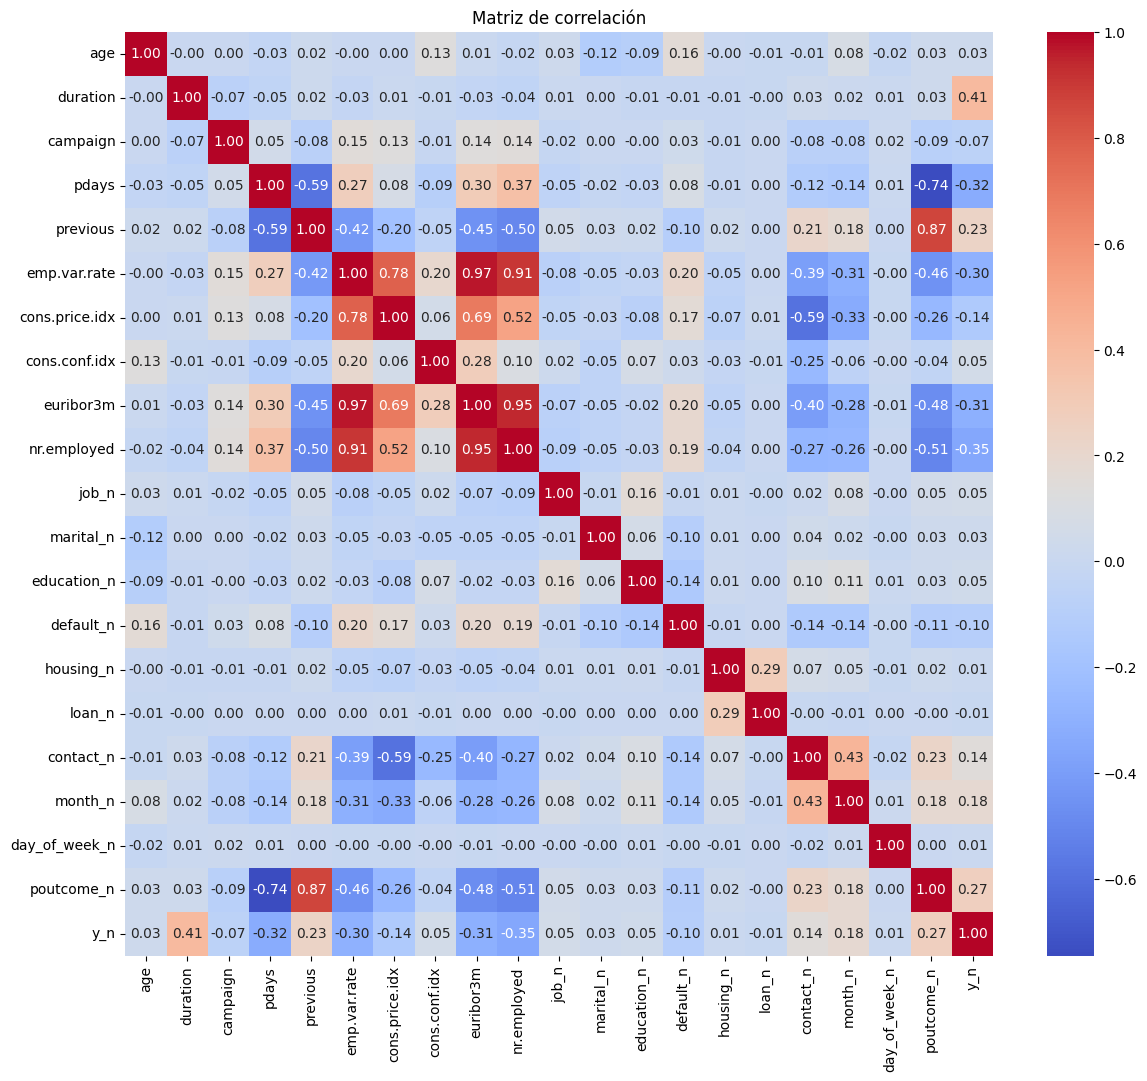

In [15]:

# Ruta al archivo JSON con las reglas de factorización
json_file_path = "/workspaces/ejercicio_regresion_logistica/src/categorical_transformation_rules.json"

# Cargar el archivo JSON
with open(json_file_path, 'r') as file:
    factorization_rules = json.load(file)

# Aplicar la factorización a las columnas categóricas según las reglas del archivo JSON
for col, mapping in factorization_rules.items():
    df[col + "_n"] = df[col].map(mapping)

# Seleccionar todas las columnas numéricas en el DataFrame
numeric_cols = df.select_dtypes(include=['number']).columns

# Crear la matriz de correlación
corr_matrix = df[numeric_cols].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

Correlación (Heatmap) de las variables numéricas y categoricas

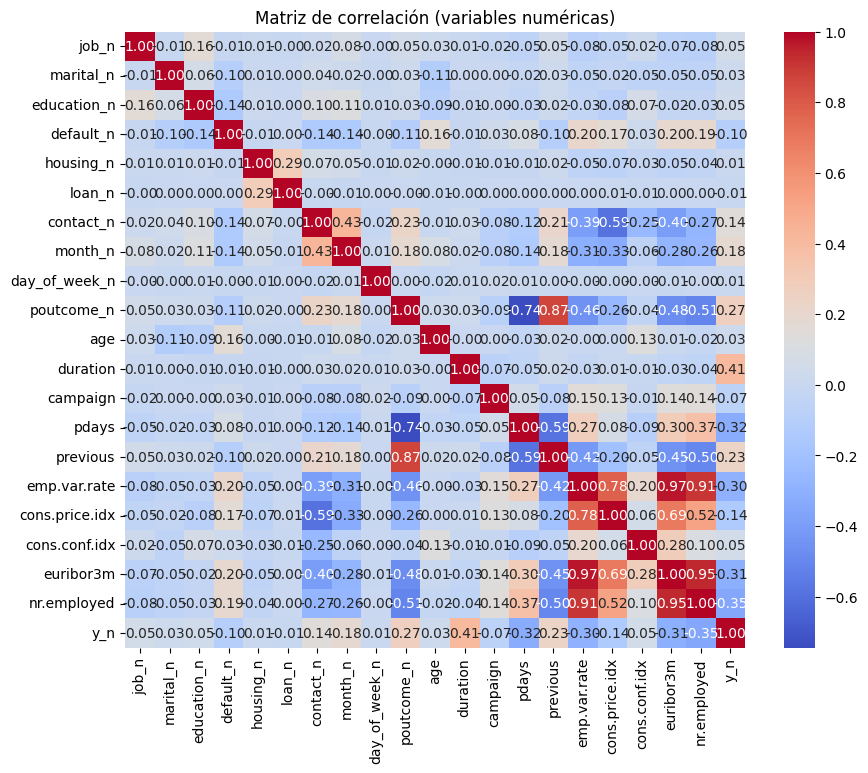

In [ ]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
num_variables = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

plt.figure(figsize=(10, 8))
corr_matrix = df[num_variables].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación (variables numéricas)")
plt.show()


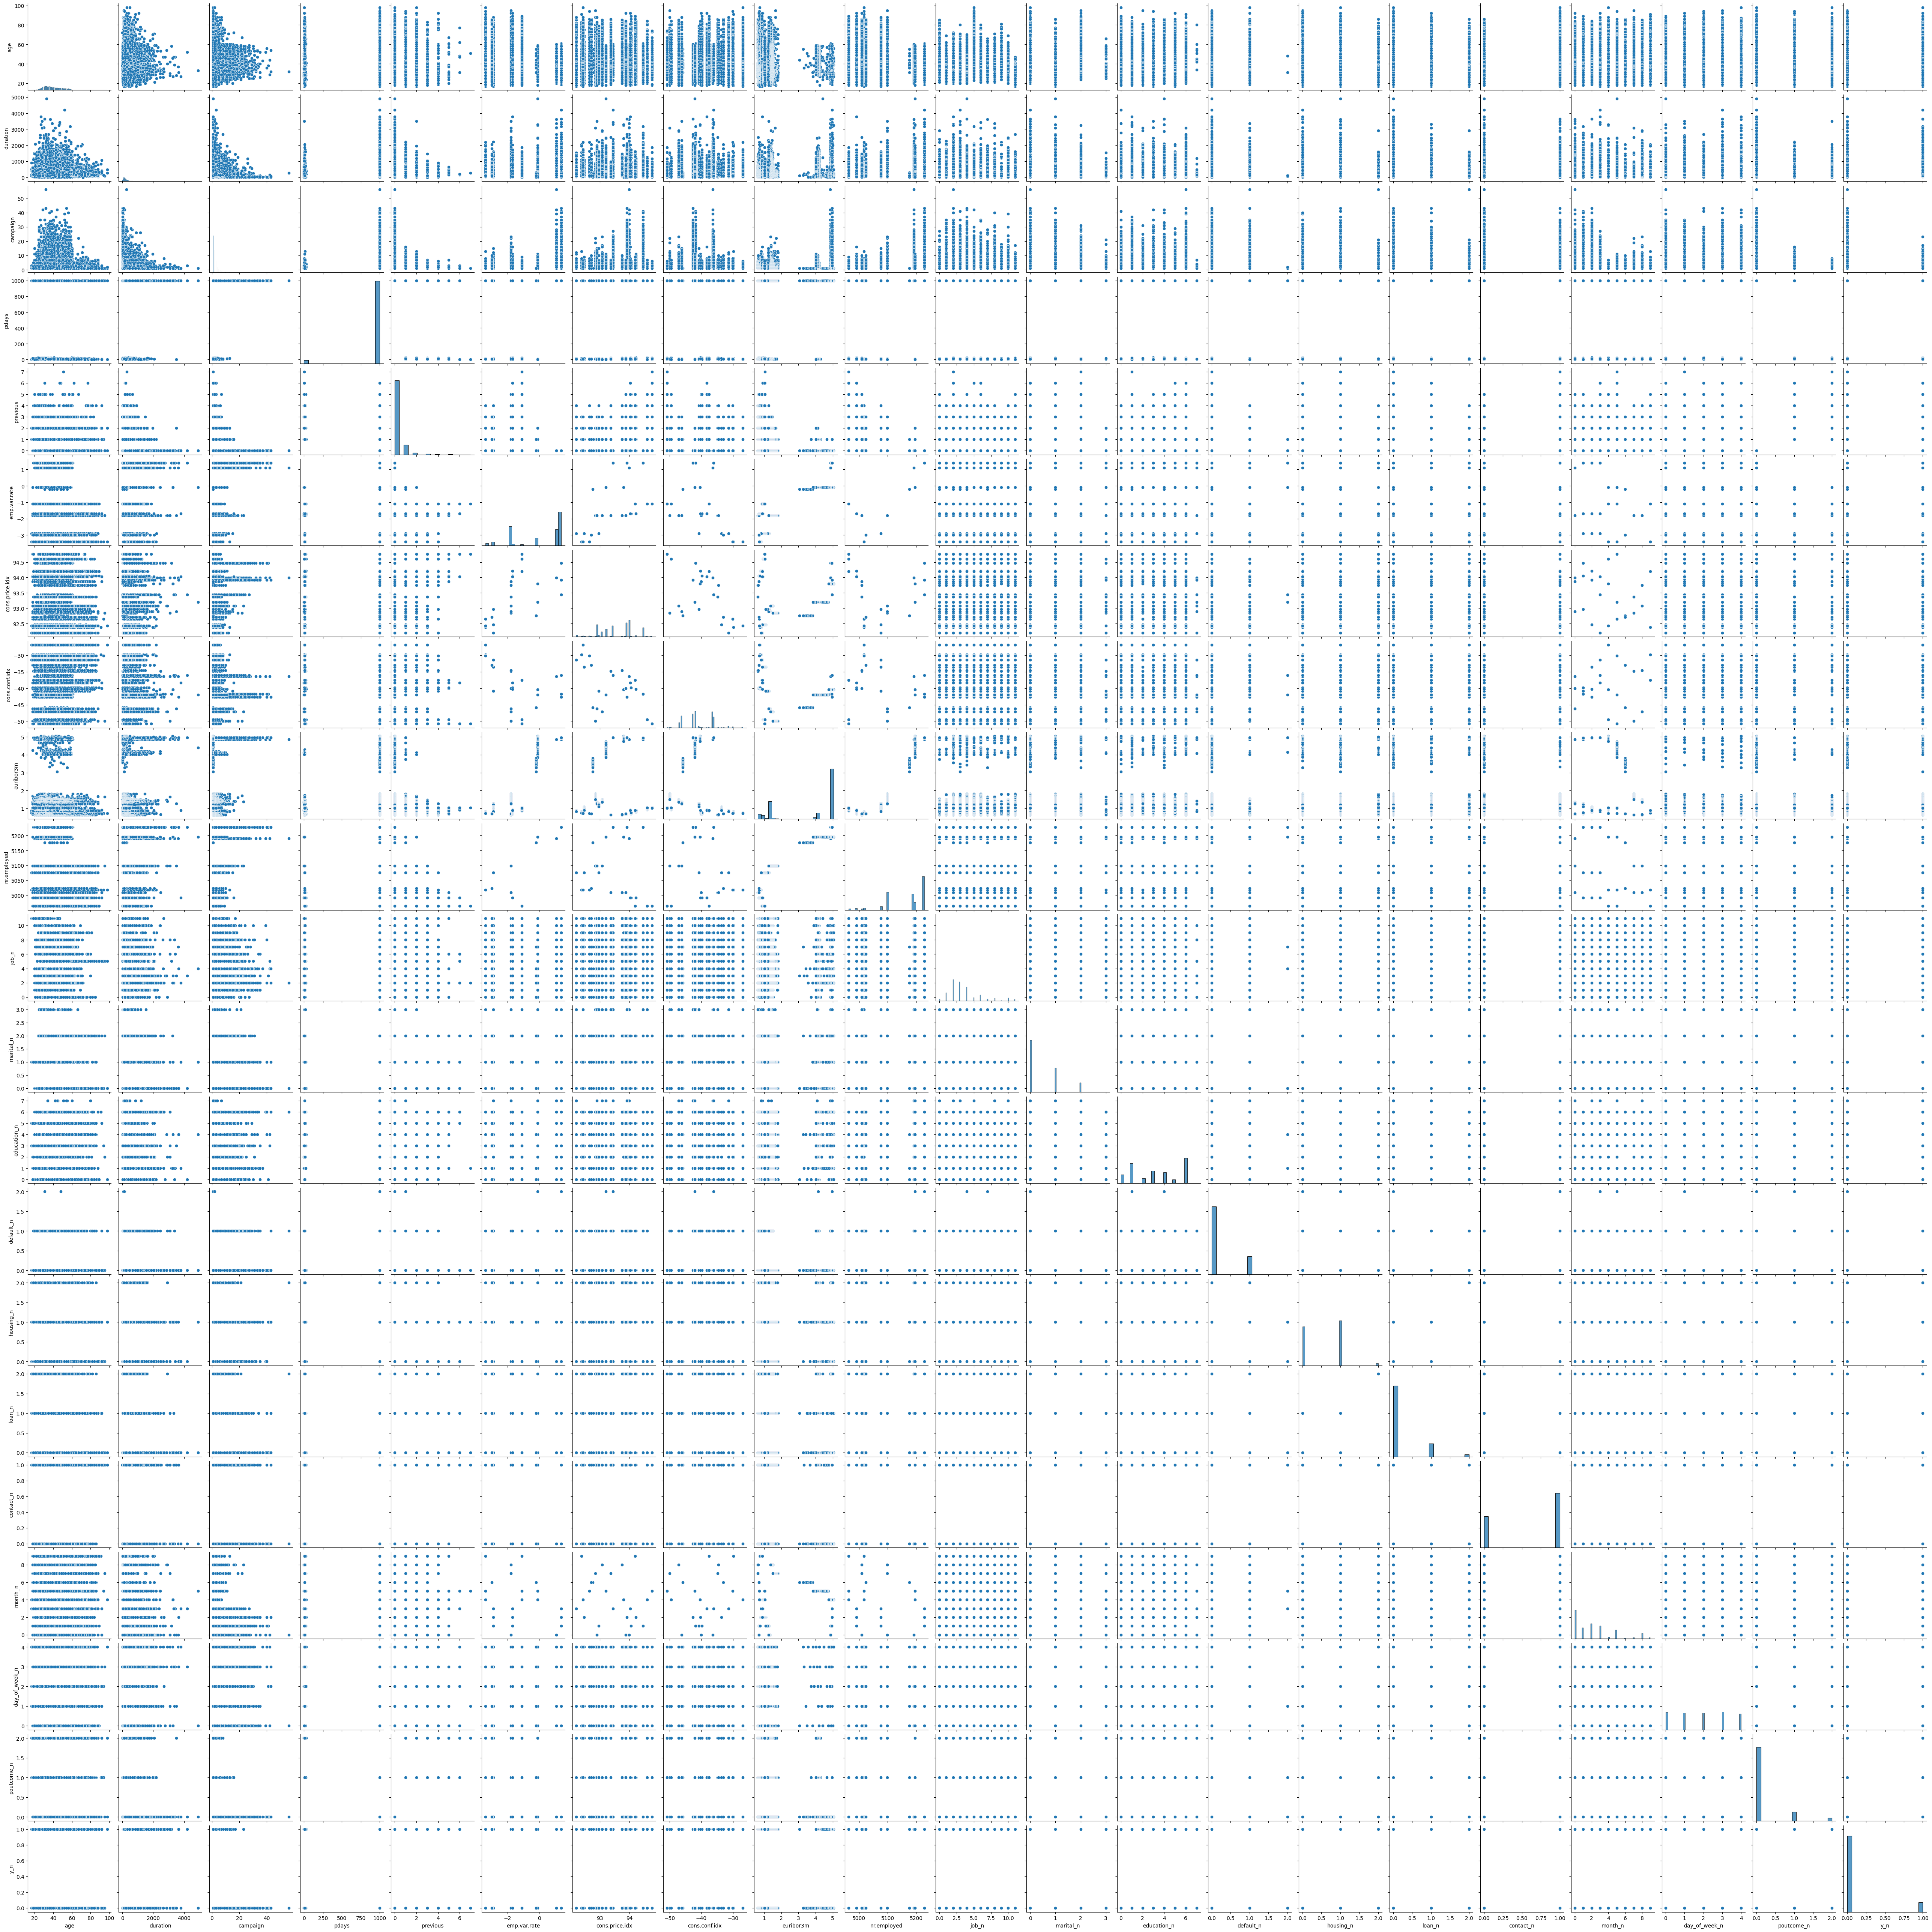

In [13]:
sns.pairplot(data = df)

In [14]:
with open("transformation_rules_target.json", "r") as f:
    transformation_rules_target = json.load(f)

# Asegurarse de que 'y_n' esté presente en el DataFrame
if "y_n" not in df.columns:
    df["y_n"] = df["y"].apply(lambda x: transformation_rules_target[x])

print(df[["y", "y_n"]].head())



    y  y_n
0  no    0
1  no    0
2  no    0
3  no    0
4  no    0


Selección de variables (features)

In [15]:
df["job_n"] = pd.factorize(df["job"])[0]
df["marital_n"] = pd.factorize(df["marital"])[0]
df["education_n"] = pd.factorize(df["education"])[0]
df["default_n"] = pd.factorize(df["default"])[0]
df["housing_n"] = pd.factorize(df["housing"])[0]
df["loan_n"] = pd.factorize(df["loan"])[0]
df["contact_n"] = pd.factorize(df["contact"])[0]
df["month_n"] = pd.factorize(df["month"])[0]
df["day_of_week_n"] = pd.factorize(df["day_of_week"])[0]
df["poutcome_n"] = pd.factorize(df["poutcome"])[0]
df["y_n"] = pd.factorize(df["y"])[0]
features = ["job_n", "marital_n", "education_n", "default_n", "housing_n", "loan_n", "contact_n", "month_n", "day_of_week_n", "poutcome_n",
                 "age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed", "y_n"]

# Manejo de Outliers
def replace_outliers_from_column(column, df):
    """
    Recorta los valores de la columna según el IQR.
    """
    stats = df[column].describe()
    iqr = stats["75%"] - stats["25%"]
    lower_limit = stats["25%"] - 1.5 * iqr
    upper_limit = stats["75%"] + 1.5 * iqr
    if lower_limit < 0: lower_limit = min(df[column])
    # Aplicamos la función lambda para recortar
    df[column] = df[column].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))
    return df, [lower_limit, upper_limit]

# Creamos dos copias del dataset:
#  - df_con_outliers: conserva los valores originales
#  - df_sin_outliers: se recortan los outliers en las columnas definidas en "features"
df_con_outliers = df.copy()
df_sin_outliers = df.copy()

outliers_dict = {}
for col in features:
    df_sin_outliers, limits = replace_outliers_from_column(col, df_sin_outliers)
    outliers_dict[col] = limits

print("Límites de outliers aplicados:")
for col, limits in outliers_dict.items():
    print(f"{col}: {limits}")

Límites de outliers aplicados:
job_n: [0, np.float64(7.0)]
marital_n: [0, np.float64(2.5)]
education_n: [0, np.float64(13.5)]
default_n: [np.float64(0.0), np.float64(0.0)]
housing_n: [0, np.float64(2.5)]
loan_n: [np.float64(0.0), np.float64(0.0)]
contact_n: [0, np.float64(2.5)]
month_n: [0, np.float64(7.5)]
day_of_week_n: [0, np.float64(6.0)]
poutcome_n: [np.float64(0.0), np.float64(0.0)]
age: [np.float64(9.5), np.float64(69.5)]
duration: [0, np.float64(644.5)]
campaign: [1, np.float64(6.0)]
pdays: [np.float64(999.0), np.float64(999.0)]
previous: [np.float64(0.0), np.float64(0.0)]
emp.var.rate: [-3.4, np.float64(6.200000000000001)]
cons.price.idx: [np.float64(91.69650000000001), np.float64(95.3725)]
cons.conf.idx: [-50.8, np.float64(-26.949999999999992)]
euribor3m: [0.634, np.float64(10.3865)]
nr.employed: [np.float64(4905.6), np.float64(5421.6)]
y_n: [np.float64(0.0), np.float64(0.0)]


División en Train/Test

In [16]:
# Extraemos las features de cada versión y el target (y_n)
X_con_outliers = df_con_outliers[features].copy()
X_sin_outliers = df_sin_outliers[features].copy()
y = df_con_outliers["y_n"].copy()  # Usamos la versión original para target, ya que y_n es la misma

# Dividimos en train/test usando la versión con outliers para obtener los índices
from sklearn.model_selection import train_test_split
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(
    X_con_outliers, y, test_size=0.2, random_state=42, stratify=y)

# Usamos los mismos índices para la versión sin outliers
X_train_sin_outliers = X_sin_outliers.loc[X_train_con_outliers.index]
X_test_sin_outliers  = X_sin_outliers.loc[X_test_con_outliers.index]

print("X_train_con_outliers:", X_train_con_outliers.shape)
print("X_train_sin_outliers:", X_train_sin_outliers.shape)
print("y_train:", y_train.shape)

# Guardar los datasets procesados
X_train_con_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_con_outliers.xlsx", index=False)
X_test_con_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_con_outliers.xlsx", index=False)
X_train_sin_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sin_outliers.xlsx", index=False)
X_test_sin_outliers.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sin_outliers.xlsx", index=False)
y_train.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/y_train.xlsx", index=False)
y_test.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/y_test.xlsx", index=False)


X_train_con_outliers: (32950, 21)
X_train_sin_outliers: (32950, 21)
y_train: (32950,)


Escalado / Normalización

In [17]:
# --- Con StandardScaler ---
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Para datos CON outliers:
scaler_con_std = StandardScaler()
scaler_con_std.fit(X_train_con_outliers)
X_train_con_std = pd.DataFrame(scaler_con_std.transform(X_train_con_outliers), columns=features, index=X_train_con_outliers.index)
X_test_con_std  = pd.DataFrame(scaler_con_std.transform(X_test_con_outliers),  columns=features, index=X_test_con_outliers.index)

# Para datos SIN outliers:
scaler_sin_std = StandardScaler()
scaler_sin_std.fit(X_train_sin_outliers)
X_train_sin_std = pd.DataFrame(scaler_sin_std.transform(X_train_sin_outliers), columns=features, index=X_train_sin_outliers.index)
X_test_sin_std  = pd.DataFrame(scaler_sin_std.transform(X_test_sin_outliers),  columns=features, index=X_test_sin_outliers.index)

print("Vista de X_train_con_normalizado:")
print(X_train_con_std.head())
print("Vista de X_train_sin_normalizado:")
print(X_train_sin_std.head())

# Guardar los datasets procesados (Normalizados)
X_train_con_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_con_outliers_normalizado.xlsx", index=False)
X_test_con_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_con_outliers_normalizado.xlsx", index=False)
X_train_sin_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sin_outliers_normalizado.xlsx", index=False)
X_test_sin_std.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sin_outliers_normalizado.xlsx", index=False)

# --- Con MinMaxScaler ---
from sklearn.preprocessing import MinMaxScaler

# Para datos CON outliers:
scaler_con_mm = MinMaxScaler()
scaler_con_mm.fit(X_train_con_outliers)
X_train_con_mm = pd.DataFrame(scaler_con_mm.transform(X_train_con_outliers), columns=features, index=X_train_con_outliers.index)
X_test_con_mm  = pd.DataFrame(scaler_con_mm.transform(X_test_con_outliers),  columns=features, index=X_test_con_outliers.index)

# Para datos SIN outliers:
scaler_sin_mm = MinMaxScaler()
scaler_sin_mm.fit(X_train_sin_outliers)
X_train_sin_mm = pd.DataFrame(scaler_sin_mm.transform(X_train_sin_outliers), columns=features, index=X_train_sin_outliers.index)
X_test_sin_mm  = pd.DataFrame(scaler_sin_mm.transform(X_test_sin_outliers),  columns=features, index=X_test_sin_outliers.index)

print("Vista de X_train_con_escalado:")
print(X_train_con_mm.head())
print("Vista de X_train_sin_escalado:")
print(X_train_sin_mm.head())

# Guardar los datasets procesados (Escalados)
X_train_con_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_con_outliers_escalado.xlsx", index=False)
X_test_con_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_con_outliers_escalado.xlsx", index=False)
X_train_sin_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sin_outliers_escalado.xlsx", index=False)
X_test_sin_mm.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sin_outliers_escalado.xlsx", index=False)

Vista de X_train_con_normalizado:
          job_n  marital_n  education_n  default_n  housing_n   loan_n  \
25611 -0.271982  -0.732357    -0.128309   1.933816  -1.056399 -0.43938   
26010  2.581966  -0.732357     1.245091  -0.516547  -1.056399 -0.43938   
40194  0.543432  -0.732357    -1.501709  -0.516547  -1.056399 -0.43938   
297   -0.679689  -0.732357     1.245091  -0.516547   0.790589 -0.43938   
36344  0.543432   2.140059     1.245091  -0.516547  -1.056399 -0.43938   

       contact_n   month_n  day_of_week_n  poutcome_n  ...  duration  \
25611   0.758915  1.134460       0.012175   -0.374417  ... -0.120196   
26010  -1.317671  1.134460       0.012175    1.813389  ... -0.216732   
40194   0.758915 -0.102089      -1.402820   -0.374417  ...  3.436173   
297    -1.317671 -0.926454      -1.402820   -0.374417  ... -0.533368   
36344   0.758915 -0.514272      -0.695323   -0.374417  ...  0.424264   

       campaign     pdays  previous  emp.var.rate  cons.price.idx  \
25611  0.522981  0.

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Número de características a seleccionar
k = 5

# Creamos el selector usando f_classif
selector = SelectKBest(score_func=f_classif, k=k)

# Aplicamos el selector a los datos escalados sin outliers
# (puedes elegir también la versión con outliers si lo prefieres)
selector.fit(X_train_sin_std, y_train)

# Obtenemos la máscara booleana de las características seleccionadas
mask = selector.get_support()

# Extraemos los nombres de las columnas seleccionadas a partir de nuestra lista 'features'
selected_features = np.array(features)[mask]
print("Características seleccionadas:", selected_features)

# Transformamos los datasets de train y test para quedarnos solo con las características seleccionadas
X_train_sel = pd.DataFrame(selector.transform(X_train_sin_std),
                           columns=selected_features,
                           index=X_train_sin_std.index)
X_test_sel = pd.DataFrame(selector.transform(X_test_sin_std),
                          columns=selected_features,
                          index=X_test_sin_std.index)

print("X_train_sel shape:", X_train_sel.shape)
print("X_test_sel shape:", X_test_sel.shape)

# (Opcional) Guardar los datasets seleccionados
X_train_sel.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_train_sel.xlsx", index=False)
X_test_sel.to_excel("/workspaces/ejercicio_regresion_logistica/data/processed/X_test_sel.xlsx", index=False)


Características seleccionadas: ['month_n' 'duration' 'emp.var.rate' 'euribor3m' 'nr.employed']
X_train_sel shape: (32950, 5)
X_test_sel shape: (8238, 5)
